In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import missingno as msgo
from datetime import datetime
import matplotlib.pyplot as plt
print(plt.style.available)
plt.style.use('seaborn-bright')
%matplotlib inline

['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10', '_classic_test']


In [2]:
train_data = pd.read_csv('../inputs/train.csv')
test_data = pd.read_csv('../inputs/test.csv')
print('The train set shape:{}'.format(train_data.shape))
print('The test set shape:{}'.format(test_data.shape))

The train set shape:(10886, 12)
The test set shape:(6493, 9)


In [3]:
display(train_data.head().transpose())

,0,1,2,3,4
datetime,2011-01-01 00:00:00,2011-01-01 01:00:00,2011-01-01 02:00:00,2011-01-01 03:00:00,2011-01-01 04:00:00
season,1,1,1,1,1
holiday,0,0,0,0,0
workingday,0,0,0,0,0
weather,1,1,1,1,1
temp,9.84,9.02,9.02,9.84,9.84
atemp,14.395,13.635,13.635,14.395,14.395
humidity,81,80,80,75,75
windspeed,0,0,0,0,0
casual,3,8,5,3,0


In [4]:
display(test_data.head().transpose())

,0,1,2,3,4
datetime,2011-01-20 00:00:00,2011-01-20 01:00:00,2011-01-20 02:00:00,2011-01-20 03:00:00,2011-01-20 04:00:00
season,1,1,1,1,1
holiday,0,0,0,0,0
workingday,1,1,1,1,1
weather,1,1,1,1,1
temp,10.66,10.66,10.66,10.66,10.66
atemp,11.365,13.635,13.635,12.88,12.88
humidity,56,56,56,56,56
windspeed,26.0027,0,0,11.0014,11.0014


In [5]:
all_data = [train_data,test_data]

## Feature engineering

In [6]:
for data_set in all_data:
    data_set['datetime'] = pd.to_datetime(data_set['datetime'],errors='coerce')
    data_set['date'] = data_set['datetime'].apply(lambda x: x.date())
    data_set['hour'] = data_set['datetime'].apply(lambda x: x.hour)
    data_set['weekday'] = data_set['datetime'].apply(lambda x: x.weekday())
    data_set['month'] = data_set['datetime'].apply(lambda x: x.month)
    data_set['year'] = data_set['datetime'].apply(lambda x: x.year)
    data_set['season'] = data_set['season'].map({1:'Spring',
                                                 2:'Summer',
                                                 3:'Fall',
                                                 4:'Winter'})
    data_set['weather'] = data_set['weather'].map({1: " Clear + Few clouds + Partly cloudy + Partly cloudy",
                                                   2 : " Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist ",
                                                   3 : " Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds",
                                                   4 :" Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog "})
    display(data_set.sample(2).transpose())

,1010,3772
datetime,2011-03-06 14:00:00,2011-09-08 04:00:00
season,Spring,Fall
holiday,0,0
workingday,0,1
weather,"Light Snow, Light Rain + Thunderstorm + Scatt...","Mist + Cloudy, Mist + Broken clouds, Mist + F..."
temp,18.04,25.42
atemp,21.97,27.275
humidity,100,94
windspeed,15.0013,6.0032
casual,12,0


,243,1479
datetime,2011-01-31 10:00:00,2011-06-27 15:00:00
season,Spring,Fall
holiday,0,0
workingday,1,1
weather,"Mist + Cloudy, Mist + Broken clouds, Mist + F...","Mist + Cloudy, Mist + Broken clouds, Mist + F..."
temp,6.56,30.34
atemp,7.575,34.09
humidity,59,55
windspeed,12.998,0
date,2011-01-31,2011-06-27


<Figure size 432x288 with 0 Axes>

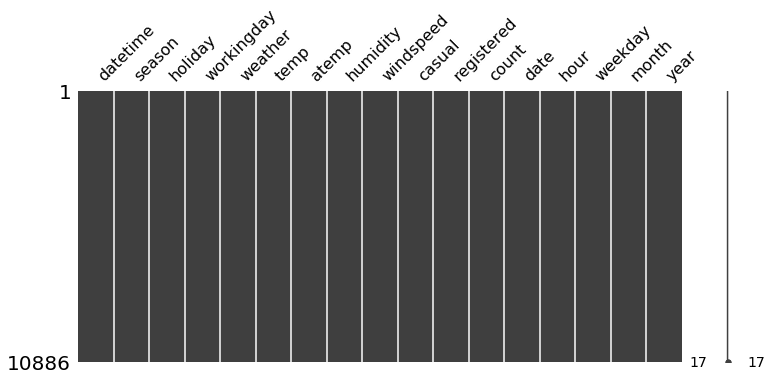

In [7]:
plt.figure()
msgo.matrix(train_data,figsize=(12,5))
plt.show()

In [8]:
train_data_missing = train_data.apply(lambda x: x.isnull().sum())
display(train_data_missing.transpose())

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
date          0
hour          0
weekday       0
month         0
year          0
dtype: int64

<Figure size 432x288 with 0 Axes>

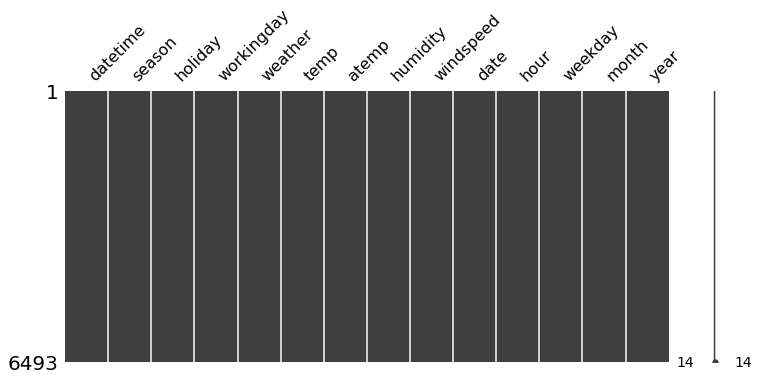

In [9]:
plt.figure()
msgo.matrix(test_data,figsize=(12,5))
plt.show()

In [10]:
test_data_missing = test_data.apply(lambda x: x.isnull().sum())
display(test_data_missing)

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
date          0
hour          0
weekday       0
month         0
year          0
dtype: int64

### The count variable

D:\ProgramData\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


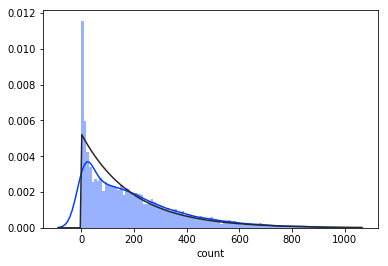

In [11]:
plt.figure()
sns.distplot((train_data['count']),bins=100,fit=stats.expon)
plt.show()

D:\ProgramData\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


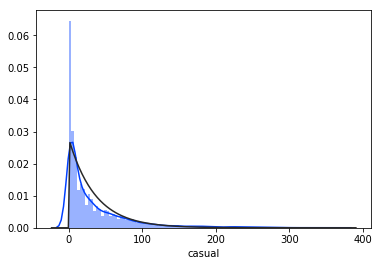

In [12]:
plt.figure()
sns.distplot((train_data['casual']),bins=100,fit=stats.expon)
plt.show()

D:\ProgramData\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


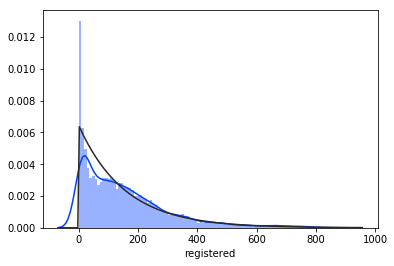

In [13]:
plt.figure()
sns.distplot((train_data['registered']),bins=100,fit=stats.expon)
plt.show()

D:\ProgramData\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
D:\ProgramData\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


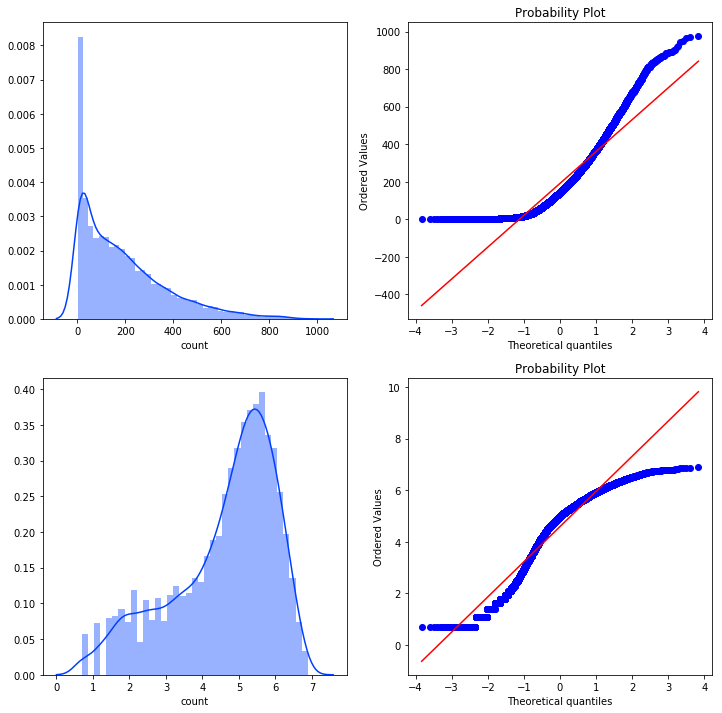

In [14]:
fig, axes = plt.subplots(ncols=2,nrows=2,figsize=(12,12))
sns.distplot(train_data['count'],ax=axes[0,0])
stats.probplot(train_data['count'],dist='norm',fit=True,plot=axes[0,1])
sns.distplot(np.log1p(train_data['count']),ax=axes[1,0])
stats.probplot(np.log1p(train_data['count']),dist='norm',fit=True,plot=axes[1,1])
plt.show()

In [15]:
boxplot_var = ['season','holiday','workingday','weather','hour','weekday','month','year']

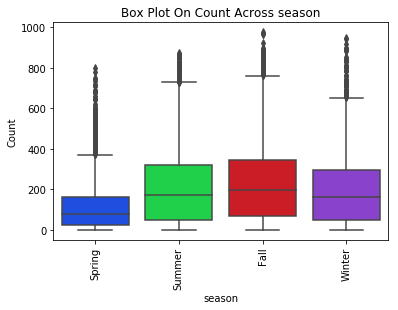

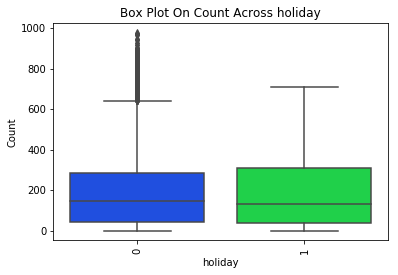

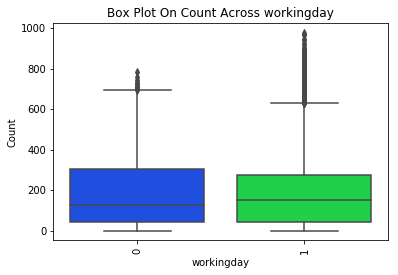

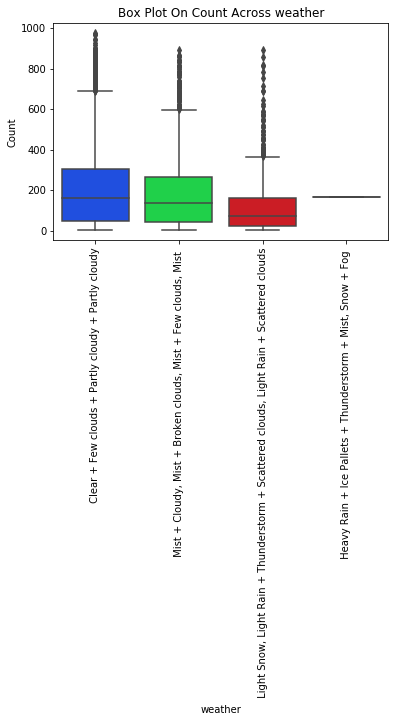

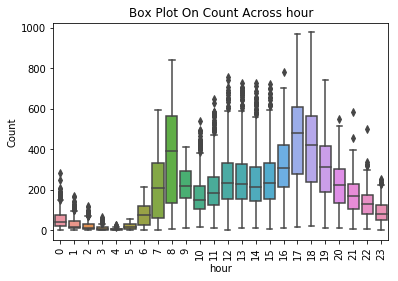

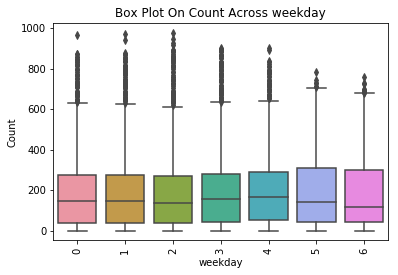

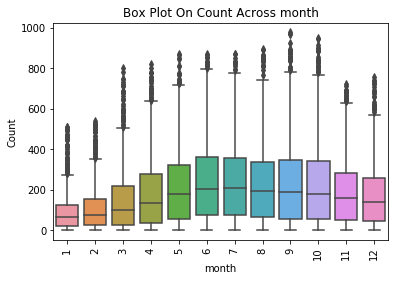

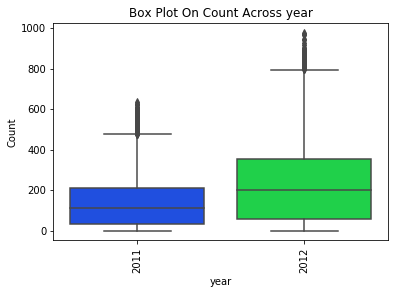

In [16]:
for var in boxplot_var:
    plt.figure()
    sns.boxplot(data=train_data,x=var,y='count',orient='v')
    plt.xlabel(var)
    plt.xticks(rotation=90)
    plt.ylabel('Count')
    plt.title('Box Plot On Count Across {}'.format(var))
    plt.show()

### month & year

In [17]:
groupby_year_month = train_data.groupby(by=['year','month'])['count','casual','registered'].median().reset_index()
display(groupby_year_month.head())

,year,month,count,casual,registered
0,2011,1,47.0,2.0,43.0
1,2011,2,59.0,4.0,52.5
2,2011,3,72.0,9.0,56.0
3,2011,4,84.0,12.0,65.0
4,2011,5,154.0,27.0,120.0


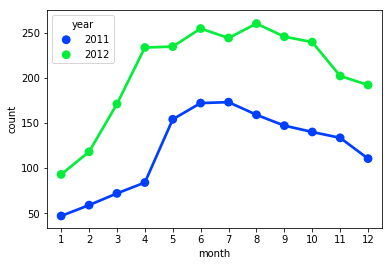

In [18]:
plt.figure()
sns.pointplot(data=groupby_year_month,x='month',y='count',hue='year')
plt.show()

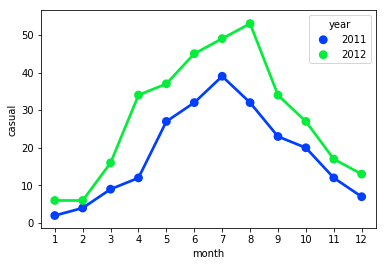

In [19]:
plt.figure()
sns.pointplot(data=groupby_year_month,x='month',y='casual',hue='year')
plt.show()

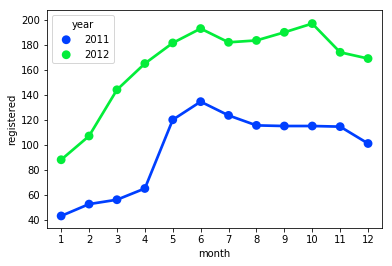

In [20]:
plt.figure()
sns.pointplot(data=groupby_year_month,x='month',y='registered',hue='year')
plt.show()

### weekday & year

In [21]:
groupby_year_weekday = train_data.groupby(['year','weekday'])['count','casual','registered'].median().reset_index()
display(groupby_year_weekday.head())

,year,weekday,count,casual,registered
0,2011,0,122.5,16.0,95.0
1,2011,1,110.0,11.0,96.0
2,2011,2,96.5,8.0,83.0
3,2011,3,118.0,9.0,103.0
4,2011,4,132.0,14.0,107.0


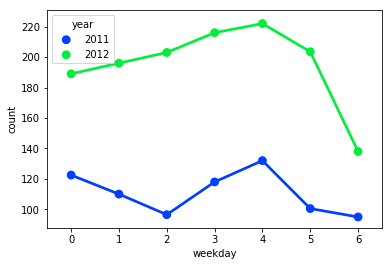

In [22]:
plt.figure()
sns.pointplot(data=groupby_year_weekday,x='weekday',y='count',hue='year')
plt.show()

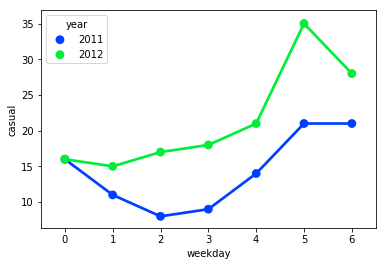

In [23]:
plt.figure()
sns.pointplot(data=groupby_year_weekday,x='weekday',y='casual',hue='year')
plt.show()

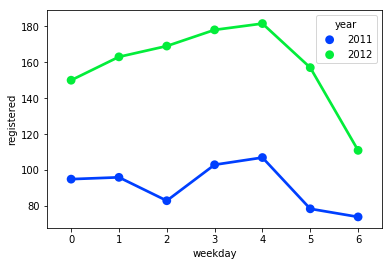

In [24]:
plt.figure()
sns.pointplot(data=groupby_year_weekday,x='weekday',y='registered',hue='year')
plt.show()

### hour & year

In [25]:
groupby_year_hour = train_data.groupby(['hour','year'])['count','casual','registered'].median().reset_index()
display(groupby_year_hour.head())

,hour,year,count,casual,registered
0,0,2011,32.0,6.0,25.0
1,0,2012,49.0,8.0,44.0
2,1,2011,16.0,3.5,12.0
3,1,2012,23.5,4.0,19.0
4,2,2011,10.0,2.0,7.0


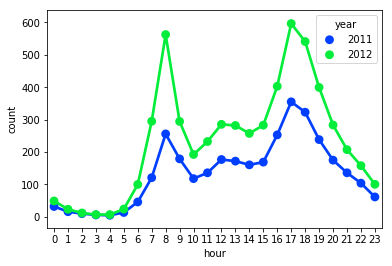

In [26]:
plt.figure()
sns.pointplot(data=groupby_year_hour,x='hour',y='count',hue='year')
plt.show()

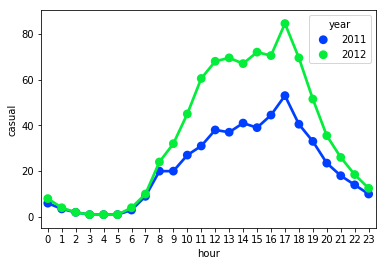

In [27]:
plt.figure()
sns.pointplot(data=groupby_year_hour,x='hour',y='casual',hue='year')
plt.show()

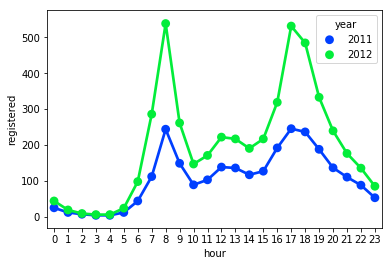

In [28]:
plt.figure()
sns.pointplot(data=groupby_year_hour,x='hour',y='registered',hue='year')
plt.show()

Text(0.5,1,'Average Count by Month')

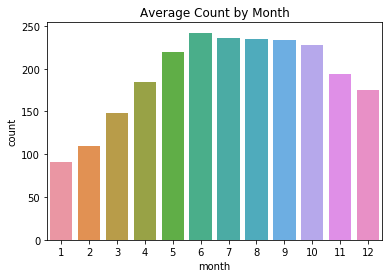

In [29]:
MonthAverage = train_data.groupby('month')['count'].mean().reset_index()
sns.barplot(data=MonthAverage,x='month',y='count')
plt.title('Average Count by Month')

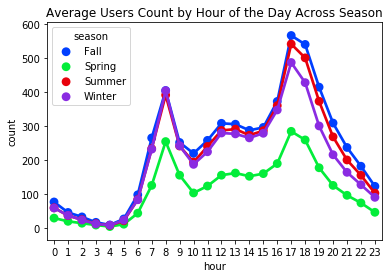

In [30]:
SeasonAndHourAverage = train_data.groupby(['season','hour'])['count'].mean().reset_index()
sns.pointplot(data=SeasonAndHourAverage,x='hour',y='count',hue='season')
plt.title('Average Users Count by Hour of the Day Across Season')
plt.show()

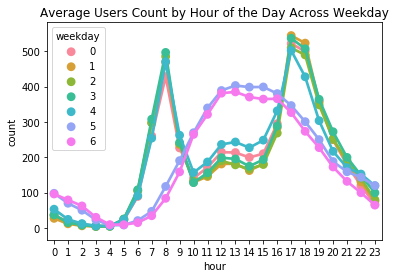

In [31]:
WeekdayAndHourAverage = train_data.groupby(['weekday','hour'])['count'].mean().reset_index()
sns.pointplot(data=WeekdayAndHourAverage,x='hour',y='count',hue='weekday')
plt.title('Average Users Count by Hour of the Day Across Weekday')
plt.show()

## Filling 0's in windspeed using randomforest

In [32]:
full_data = train_data.append(test_data)
print(full_data.shape)

(17379, 17)


D:\ProgramData\Anaconda\lib\site-packages\pandas\core\frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [58]:
full_dataWind0 = full_data[full_data['windspeed']==0].copy()
full_dataWindNot0 = full_data[full_data['windspeed']!=0].copy()
print(full_dataWind0.shape,full_dataWindNot0.shape)

(2180, 17) (15199, 17)


In [59]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [101]:
windVals = ['season','weather','humidity',
            'month','temp','year','atemp','hour']
for val in ['season','weather','month','hour','year']:
    full_dataWindNot0[val] = full_dataWindNot0[val].astype('object')
    full_dataWind0[val] = full_dataWind0[val].astype('object')

windDataNot0 = pd.get_dummies(full_dataWindNot0[windVals])
windData0 = pd.get_dummies(full_dataWind0[windVals])
print(windDataNot0.shape)
print(windData0.shape)

(15199, 49)
(2180, 48)


In [103]:
windData0Val = windData0.columns
windDataNot0Val = windDataNot0.columns
wind_rf_val_list = windData0Val[windData0Val.isin(windDataNot0Val)]
print(wind_rf_val_list)
print(len(wind_rf_val_list))

Index(['humidity', 'temp', 'atemp', 'season_Fall', 'season_Spring',
       'season_Summer', 'season_Winter',
       'weather_ Clear + Few clouds + Partly cloudy + Partly cloudy',
       'weather_ Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds',
       'weather_ Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist ',
       'month_1', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6',
       'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'month_12',
       'year_2011', 'year_2012', 'hour_0', 'hour_1', 'hour_2', 'hour_3',
       'hour_4', 'hour_5', 'hour_6', 'hour_7', 'hour_8', 'hour_9', 'hour_10',
       'hour_11', 'hour_12', 'hour_13', 'hour_14', 'hour_15', 'hour_16',
       'hour_17', 'hour_18', 'hour_19', 'hour_20', 'hour_21', 'hour_22',
       'hour_23'],
      dtype='object')
48


In [104]:
windDataNot0 = windDataNot0[wind_rf_val_list]
print(windDataNot0.shape)

(15199, 48)


In [105]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

In [106]:
wind_rf = RandomForestRegressor(random_state=2018,oob_score=True)
param_grid = {'n_estimators':[500,1000],
              'max_features':[0.75,0.85,0.95]}
grid_search = GridSearchCV(estimator=wind_rf,
                           param_grid=param_grid,
                           cv=3,
                           scoring='neg_mean_squared_error',
                           verbose=2,
                           n_jobs=3)

In [107]:
grid_search.fit(X=windDataNot0,y=full_dataWindNot0['windspeed'])

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=3)]: Done  18 out of  18 | elapsed:  6.5min finished


GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=True, random_state=2018, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=3,
       param_grid={'n_estimators': [500, 1000], 'max_features': [0.75, 0.85, 0.95]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=2)

In [108]:
grid_search.best_params_

{'max_features': 0.85, 'n_estimators': 1000}

In [109]:
grid_search.best_estimator_.oob_score_

0.43351776603674075

In [110]:
wind0Values = grid_search.best_estimator_.predict(X=windData0)
windValues = grid_search.best_estimator_.predict(X=windDataNot0)

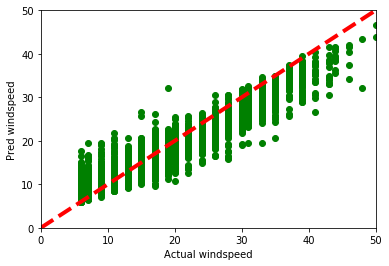

In [111]:
plt.figure()
plt.plot(full_dataWindNot0['windspeed'],windValues,'go')
plt.plot([0,50],[0,50],'r--',linewidth=4)
plt.axis([0,50,0,50])
plt.xlabel('Actual windspeed')
plt.ylabel('Pred windspeed')
plt.show()